# Data Encoding and Preprocessing 

* preprocessing module within sklearn package

In [10]:
from sklearn import preprocessing 

In [11]:
preprocessing.OrdinalEncoder

sklearn.preprocessing._encoders.OrdinalEncoder

* mixed dataset

In [41]:
import seaborn as sns
dft = sns.load_dataset('titanic')

* contious dataset

In [44]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [43]:
import pandas as pd 
dfh = pd.DataFrame(housing['data'], columns=housing['feature_names'])

## Discrete Transformations

* categorical (/classified) data -> numbers

In [75]:
X = np.array([['Red'], ['Green'], ['Green'], ['Blue']])
X # row-column (column vector)

array([['Red'],
       ['Green'],
       ['Green'],
       ['Blue']], dtype='<U5')

In [76]:
X.ravel() # linear 

array(['Red', 'Green', 'Green', 'Blue'], dtype='<U5')

### Ordinal Encoder

* ranked classes

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
enc = OrdinalEncoder()
enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [56]:
enc.categories_

[array(['Blue', 'Green', 'Red'], dtype='<U5')]

In [58]:
Xt = enc.transform(X)

In [59]:
enc.inverse_transform(Xt)

array([['Red'],
       ['Green'],
       ['Green'],
       ['Blue']], dtype='<U5')

### One-Hot Encoder

* equi-distance multi-class columns

In [61]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [62]:
enc.categories_

[array(['Blue', 'Green', 'Red'], dtype='<U5')]

In [66]:
enc.transform(X)

<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [67]:
enc.transform(X).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

### Label Encoder

In [69]:
le = LabelEncoder()
le.fit(X.ravel())

LabelEncoder()

In [70]:
le.classes_

array(['Blue', 'Green', 'Red'], dtype='<U5')

In [72]:
le.transform(X.ravel()) 

array([2, 1, 1, 0])

In [77]:
le.inverse_transform([2, 2, 1])

array(['Red', 'Red', 'Green'], dtype='<U5')

### Binarizer

In [78]:
from sklearn.preprocessing import Binarizer

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

transformer = Binarizer().fit(X)  # fit does nothing.

* default: +'ve to 1, -'ve to 0
* can: choose own threshold

In [79]:
transformer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Continuous Transformations

### Normalizer

* norm-alizer
* norm = distance measure
* norm-alization = going between 0 and 1 in distance

In [80]:
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]

In [81]:
transformer = Normalizer().fit(X)  # fit does nothing.

In [83]:
transformer.transform(X)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

### Scalar

In [85]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
scaler.mean_, scaler.var_

(array([0.5, 0.5]), array([0.25, 0.25]))

In [91]:
scaler.transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

## Preparation Comparison

In [7]:
from sklearn.preprocessing import *

transforms = [ 
    FunctionTransformer(lambda x: x, validate=False),
    StandardScaler(),
    MinMaxScaler(), 
    MaxAbsScaler(),
    RobustScaler(quantile_range=(25, 75)),
    PowerTransformer(method='yeo-johnson'),
    PowerTransformer(method='box-cox'),
    QuantileTransformer(output_distribution='normal'),
    QuantileTransformer(output_distribution='uniform'),
    Normalizer()
 ]


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

housing =  fetch_california_housing()

In [3]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [9]:
X_full, y_full, *_ = housing.values()

X = X_full[:, [0, 5]]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)
y

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

In [32]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = mpl.cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')
    
def plot_transform(tf, X):
    title = tf.__class__.__name__ + ' ' + str(tf.get_params())[1:-1]
    X = tf.fit_transform(X)
    
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Post-Transform (Full)")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="X0: Median Income",
                      x1_label="X5: Number of households",
                      title="Post-Transform (Zoom)")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=mpl.cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of MedianHouseValue')

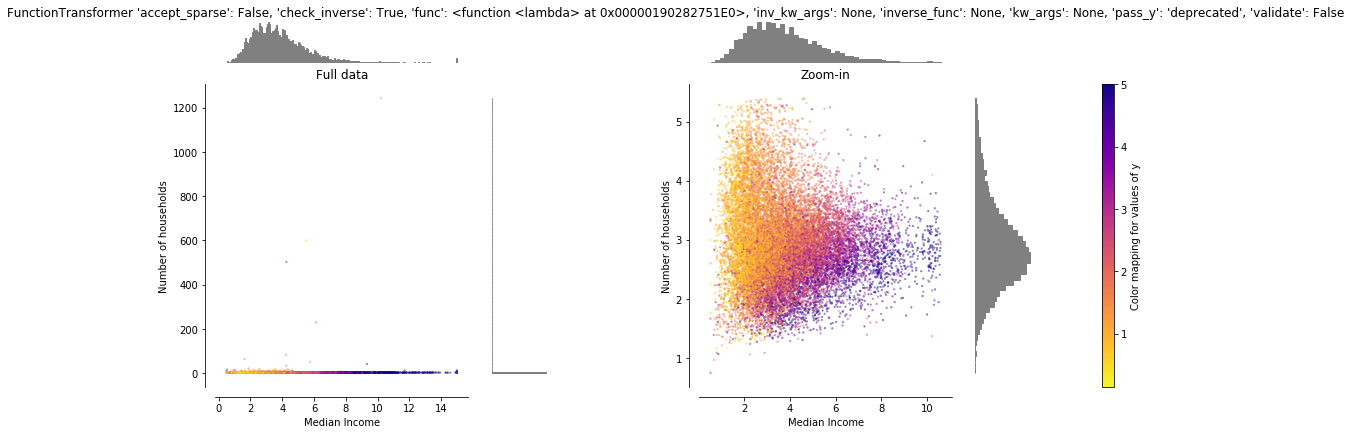

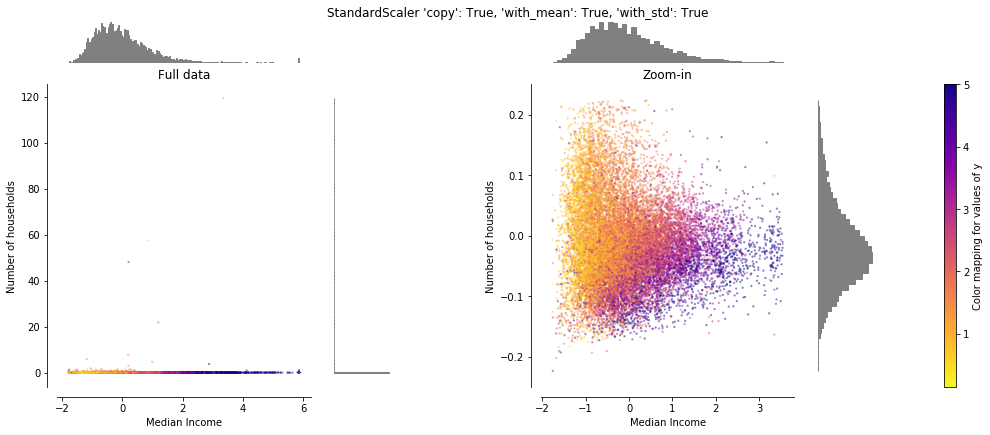

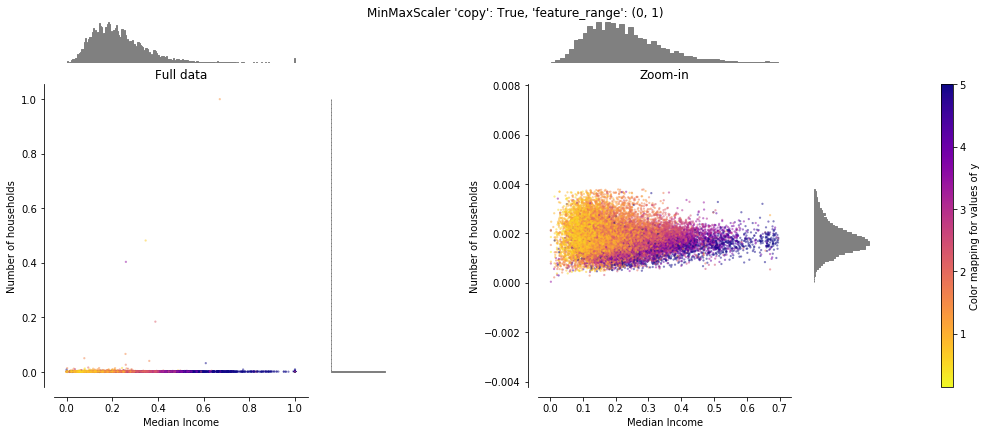

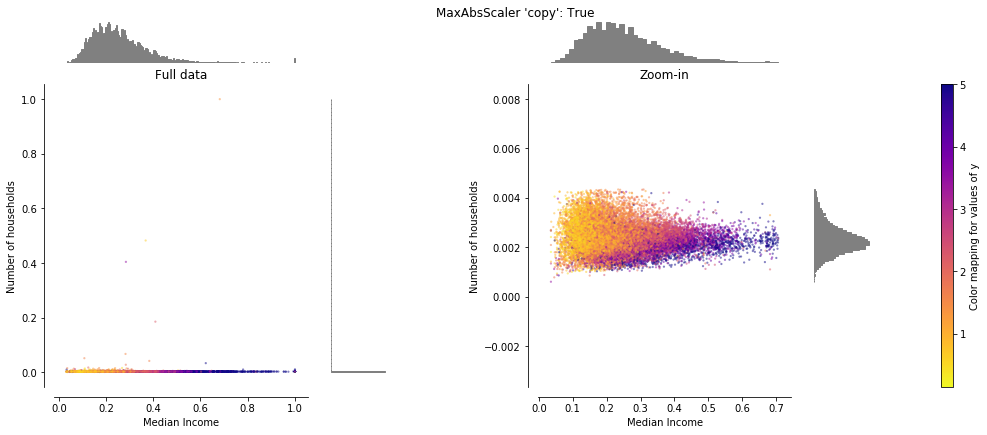

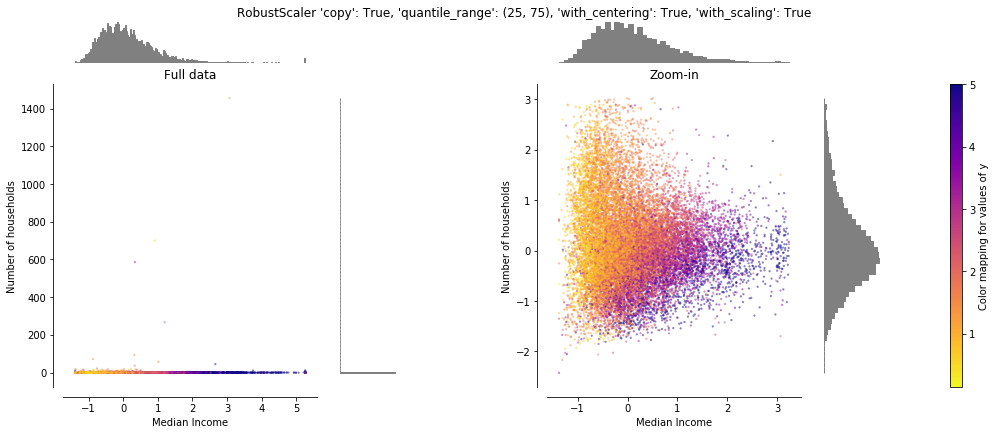

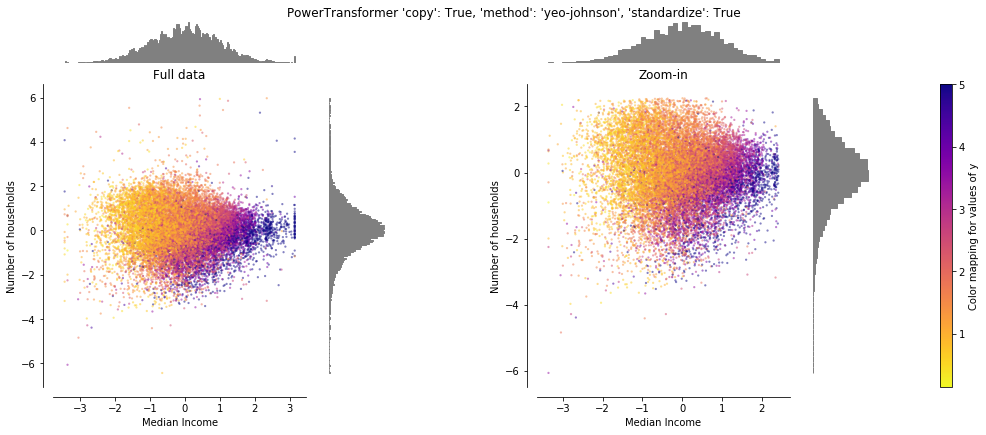

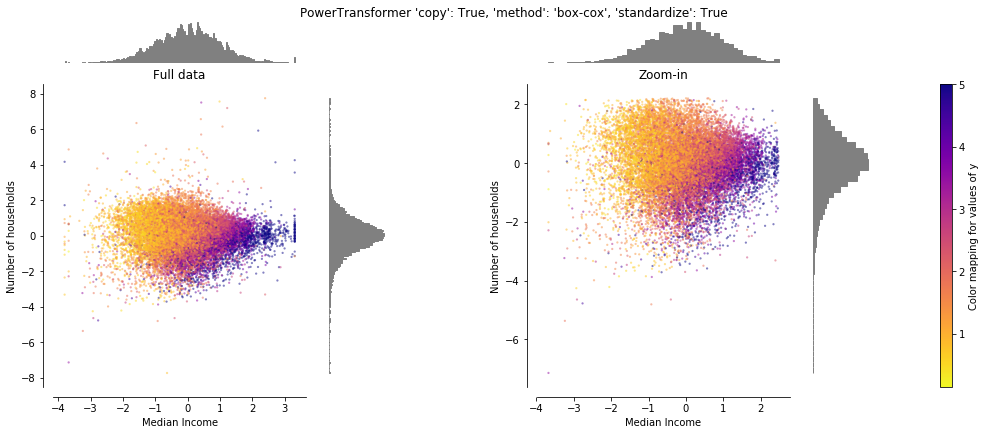

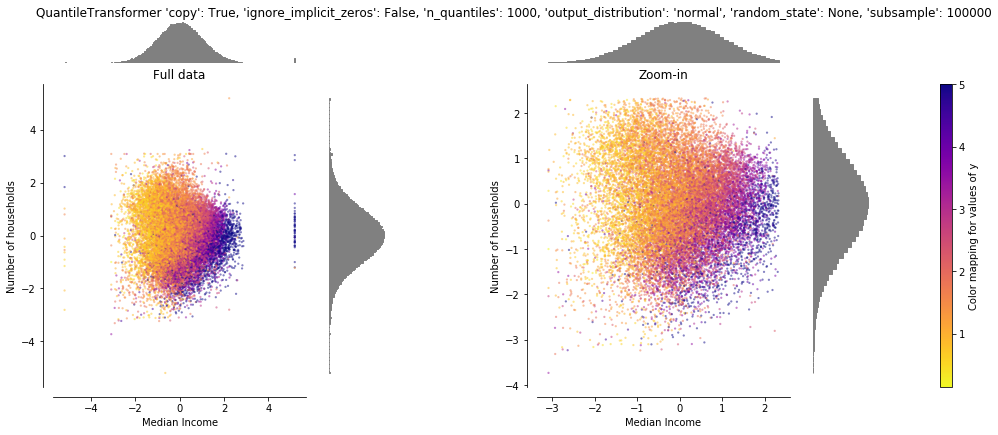

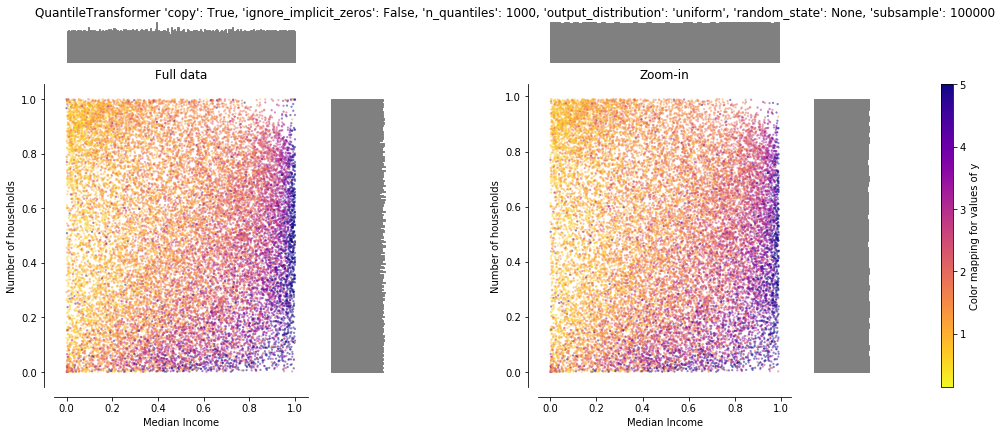

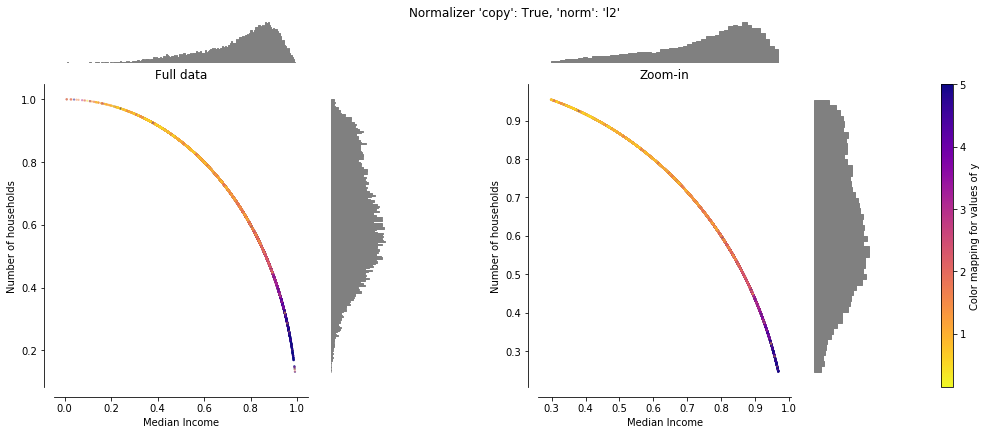

In [20]:
for t in transforms:
    plot_transform(t, X)

#### Licences

* Partly derived from 
    - charting work by
        ```
        Raghav RV <rvraghav93@gmail.com>
        Guillaume Lemaitre <g.lemaitre58@gmail.com>
        Thomas Unterthiner
        Licence: BSD 3 clause
        ```
    - sklearn library work by
        ```
        Copyright (c) 2007–2019 The scikit-learn developers.
        Licence: New BSD
        ```